# Part1

In [219]:
import pandas as pd

births = pd.read_clipboard(names= ['birth_year', 'male', 'female', 'births'], skiprows=2)  

In [220]:
births

,birth_year,male,female,births
0,1880,"118,399","97,606","216,005"
1,1881,"108,282","98,855","207,137"
2,1882,"122,031","115,695","237,726"
3,1883,"112,475","120,059","232,534"
4,1884,"122,738","137,585","260,323"
...,...,...,...,...
135,2015,"2,041,684","1,948,338","3,990,022"
136,2016,"2,022,397","1,932,697","3,955,094"
137,2017,"1,974,842","1,885,327","3,860,169"
138,2018,"1,938,110","1,854,346","3,792,456"


In [221]:
births.dtypes

birth_year     int64
male          object
female        object
births        object
dtype: object

In [222]:
#convert objects to integer 
for col in births:
    if births[col].dtype == object:
        print(births[col].dtype)
        births[col] = births[col].replace({',':''}, regex=True)
        births[col] = births[col].astype(int)

object
object
object


In [223]:
births.dtypes  #all in int

birth_year    int64
male          int64
female        int64
births        int64
dtype: object

In [228]:
#decade-wise total number of births
decade = 10 * (births['birth_year'] //10)
births.pivot_table(values='births',index=decade, aggfunc='sum')

,births
birth_year,
1880,2576730
1890,3584653
1900,4573723
1910,15458335
1920,23775277
1930,21898967
1940,30050900
1950,40252601
1960,38515388


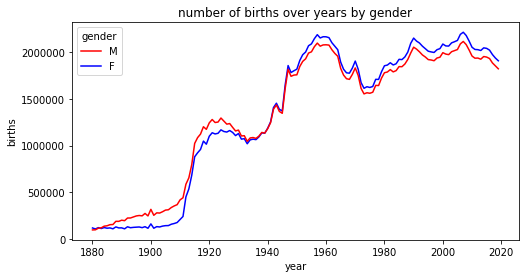

In [229]:
#Plot for number of male and female births over years
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8,4))

(rects1,) = ax.plot(births['birth_year'], births['male'], color='b', label='male')
(rects2,) = ax.plot(births['birth_year'], births['female'], color='r', label='female')

ax.legend((rects2,rects1),('M','F'),loc='upper left',title='gender')
ax.set_xlabel('year')
ax.set_ylabel('births')
ax.set_title('number of births over years by gender')
plt.show()


# Part2

In [232]:
import pandas as pd
years = list(range(1881,2011))
all_names = []
columns = ['name','sex','births']
    
for year in years:
    path = f'/names/yob{year:d}.txt'
    #f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    all_names.append(frame)    
    
names = pd.concat(all_names, ignore_index=True)

In [435]:
names.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [436]:
names.tail()

,name,sex,births,year
1688779,Zymaire,M,5,2010
1688780,Zyonne,M,5,2010
1688781,Zyquarius,M,5,2010
1688782,Zyran,M,5,2010
1688783,Zzyzx,M,5,2010


In [437]:
#grouping the births based on male and female
names.pivot_table(values='births',index='sex', aggfunc='count')

,births
sex,
F,1003043
M,685741


In [438]:
# #grouping the births of female and male births based on decades to check the count
decade = 10 * (names['year']//10)
names.pivot_table(values='births',index=decade, columns='sex', aggfunc=sum)

sex,F,M
year,,
1880,1221726,984958
1890,2221592,1141010
1900,2927622,1357699
1910,8155229,6675524
1920,11950537,11017563
1930,10659707,10559483
1940,14480943,14875294
1950,19227015,20195787
1960,18260219,19263763


In [439]:
female_names = names[names['sex']=='F']
female_names.drop(columns='sex', inplace=True)
female_names

,name,births,year
0,Mary,6919,1881
1,Anna,2698,1881
2,Emma,2034,1881
3,Elizabeth,1852,1881
4,Margaret,1658,1881
...,...,...,...
1674639,Zylynn,5,2010
1674640,Zyniya,5,2010
1674641,Zyonnah,5,2010
1674642,Zyriana,5,2010


In [440]:
male_names = names[names['sex'] =='M']
male_names.drop(columns='sex', inplace=True)
male_names

,name,births,year
938,John,8769,1881
939,William,8524,1881
940,James,5442,1881
941,George,4664,1881
942,Charles,4637,1881
...,...,...,...
1688779,Zymaire,5,2010
1688780,Zyonne,5,2010
1688781,Zyquarius,5,2010
1688782,Zyran,5,2010


In [441]:
#Set of female names and their last letters added in a list
female_names_set_labels = set(female_names['name'].values)
last_letter_list = []

for i in female_names_set_labels:
    last_letter = i[-1]
    last_letter_list.append(last_letter)

In [442]:
#Set of male names and their last letters added in a list, since few names can occur more in every year, however we need just the name across all years
male_names_set_labels = set(male_names['name'].values)
male_last_letter_list = []

for i in male_names_set_labels:
    last_letter = i[-1]
    male_last_letter_list.append(last_letter)

In [443]:
#implementing a counter for last letters
from collections import Counter
female_last_letters_counter = Counter(last_letter_list)
print('female last letter frequency:')
female_last_letters_counter

female last letter frequency:


Counter({'n': 6351,
         'o': 569,
         'e': 11501,
         'y': 3501,
         'a': 26199,
         'i': 3357,
         'u': 185,
         'h': 3921,
         'l': 2043,
         's': 1124,
         't': 618,
         'm': 224,
         'r': 854,
         'x': 54,
         'd': 301,
         'z': 170,
         'g': 135,
         'k': 93,
         'j': 25,
         'b': 38,
         'p': 25,
         'w': 29,
         'q': 10,
         'c': 53,
         'f': 12,
         'v': 14})

In [444]:
#implementing a counter for last letters
from collections import Counter
male_last_letters_counter = Counter(male_last_letter_list)
print('male last letter frequency:')
male_last_letters_counter

male last letter frequency:


Counter({'o': 2073,
         'd': 1473,
         's': 2727,
         'y': 2137,
         'k': 812,
         'a': 1757,
         'n': 9679,
         'l': 2938,
         'i': 1587,
         'e': 4451,
         'm': 803,
         'h': 1168,
         'r': 2254,
         'c': 237,
         't': 844,
         'w': 110,
         'x': 106,
         'g': 279,
         'v': 109,
         'z': 319,
         'f': 154,
         'u': 237,
         'j': 94,
         'b': 231,
         'q': 54,
         'p': 108})

In [445]:
#converting the male set to a dataframe
male_last_letters_counter_df = pd.DataFrame.from_dict(data=male_last_letters_counter, orient='index').reset_index()
male_last_letters_counter_df.rename(columns={'index': 'letter', 0:'frequency'}, inplace=True)
male_last_letters_counter_df.sort_values(by='letter', ascending=True, inplace=True)
male_last_letters_counter_df.head()

,letter,frequency
5,a,1757
23,b,231
13,c,237
1,d,1473
9,e,4451


In [446]:
#converting the female set to a dataframe
female_last_letters_counter_df = pd.DataFrame.from_dict(data=female_last_letters_counter, orient='index').reset_index()
female_last_letters_counter_df.rename(columns={'index': 'letter', 0:'frequency'}, inplace=True)
female_last_letters_counter_df.sort_values(by='letter', ascending=True, inplace=True)
female_last_letters_counter_df.head()

,letter,frequency
4,a,26199
19,b,38
23,c,53
14,d,301
2,e,11501


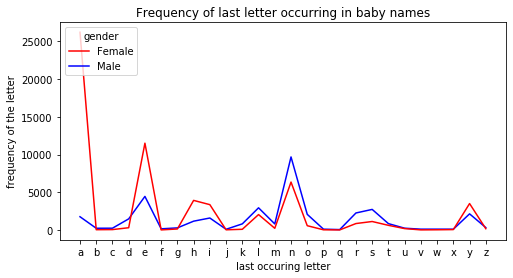

In [447]:
#Plotting the last letters of male and female
import matplotlib.pyplot as plt

import numpy as np

fig, ax = plt.subplots(figsize=(8,4))

(rects1,) = ax.plot(male_last_letters_counter_df['letter'], male_last_letters_counter_df['frequency'], color='b', label='male')
(rects2,) = ax.plot(female_last_letters_counter_df['letter'], female_last_letters_counter_df['frequency'], color='r', label='female')

ax.legend((rects2,rects1),('Female','Male'),loc='upper left',title='gender')
ax.set_xlabel('last occuring letter')
ax.set_ylabel('frequency of the letter')
ax.set_title('Frequency of last letter occurring in baby names')
plt.show()

# Part 3

In [430]:
import pandas as pd
years = list(range(1881,2011))
all_names = []
columns = ['name','sex','births']
    
for year in years:
    path = f'/names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    all_names.append(frame)    
    
names = pd.concat(all_names, ignore_index=True)

female_names = names[names['sex']=='F']
female_names.drop(columns='sex', inplace=True)
female_names

,name,births,year
0,Mary,6919,1881
1,Anna,2698,1881
2,Emma,2034,1881
3,Elizabeth,1852,1881
4,Margaret,1658,1881
...,...,...,...
1674639,Zylynn,5,2010
1674640,Zyniya,5,2010
1674641,Zyonnah,5,2010
1674642,Zyriana,5,2010


In [420]:
#pivot table for female names across decades
decade = 10 *(female_names['year']//10)
female_names_pivot_table = female_names.pivot_table(values='births', index='name', columns=decade, aggfunc=sum, dropna=True, fill_value=0)
female_names_pivot_table

year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
name,,,,,,,,,,,,,,
Aabriella,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Aaden,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Aadhya,0,0,0,0,0,0,0,0,0,0,0,0,37,19
Aadi,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Aadison,0,0,0,0,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyrie,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Zyriel,0,0,0,0,0,0,0,0,0,0,0,0,5,0
Zyrihanna,0,0,0,0,0,0,0,0,0,0,0,0,24,5


In [421]:
#retrieving columns related to 1880, 1940 & 1990 
new_pivot = female_names_pivot_table[[1880,1940,1990]]
new_pivot

year,1880,1940,1990
name,,,
Aabriella,0,0,0
Aaden,0,0,0
Aadhya,0,0,0
Aadi,0,0,0
Aadison,0,0,0
...,...,...,...
Zyrie,0,0,0
Zyriel,0,0,0
Zyrihanna,0,0,0


In [422]:
#normalizing the values across years to identify the trend 
column_maxes = new_pivot.max()
print(column_maxes)
df_max = column_maxes.max()
print(df_max)
names_norm = new_pivot / df_max

names_norm

year
1880     84607
1940    639863
1990    303008
dtype: int64
639863


year,1880,1940,1990
name,,,
Aabriella,0.0,0.0,0.0
Aaden,0.0,0.0,0.0
Aadhya,0.0,0.0,0.0
Aadi,0.0,0.0,0.0
Aadison,0.0,0.0,0.0
...,...,...,...
Zyrie,0.0,0.0,0.0
Zyriel,0.0,0.0,0.0
Zyrihanna,0.0,0.0,0.0


In [423]:
names_norm.sort_values(by=[1880,1940,1990], ascending=False, inplace=True)

In [424]:
names_norm

year,1880,1940,1990
name,,,
Mary,0.132227,1.000000,0.117760
Anna,0.055567,0.064526,0.122514
Emma,0.036572,0.035601,0.090704
Elizabeth,0.036051,0.182089,0.269564
Margaret,0.031604,0.270342,0.048870
...,...,...,...
Zyrie,0.000000,0.000000,0.000000
Zyriel,0.000000,0.000000,0.000000
Zyrihanna,0.000000,0.000000,0.000000


In [425]:
names_norm.reset_index(inplace=True)
names_norm.rename_axis(None, axis=1, inplace=True)

In [426]:
names_norm

,name,1880,1940,1990
0,Mary,0.132227,1.000000,0.117760
1,Anna,0.055567,0.064526,0.122514
2,Emma,0.036572,0.035601,0.090704
3,Elizabeth,0.036051,0.182089,0.269564
4,Margaret,0.031604,0.270342,0.048870
...,...,...,...,...
61401,Zyrie,0.000000,0.000000,0.000000
61402,Zyriel,0.000000,0.000000,0.000000
61403,Zyrihanna,0.000000,0.000000,0.000000
61404,Zyriyah,0.000000,0.000000,0.000000


In [427]:
#picking up top 100 names
names= names_norm[:100]
names

,name,1880,1940,1990
0,Mary,0.132227,1.000000,0.117760
1,Anna,0.055567,0.064526,0.122514
2,Emma,0.036572,0.035601,0.090704
3,Elizabeth,0.036051,0.182089,0.269564
4,Margaret,0.031604,0.270342,0.048870
...,...,...,...,...
95,Susan,0.004604,0.331260,0.016890
96,Nannie,0.004559,0.002246,0.000009
97,Kate,0.004524,0.001566,0.014606
98,Mildred,0.004356,0.051677,0.001363


In [428]:
names

,name,1880,1940,1990
0,Mary,0.132227,1.000000,0.117760
1,Anna,0.055567,0.064526,0.122514
2,Emma,0.036572,0.035601,0.090704
3,Elizabeth,0.036051,0.182089,0.269564
4,Margaret,0.031604,0.270342,0.048870
...,...,...,...,...
95,Susan,0.004604,0.331260,0.016890
96,Nannie,0.004559,0.002246,0.000009
97,Kate,0.004524,0.001566,0.014606
98,Mildred,0.004356,0.051677,0.001363


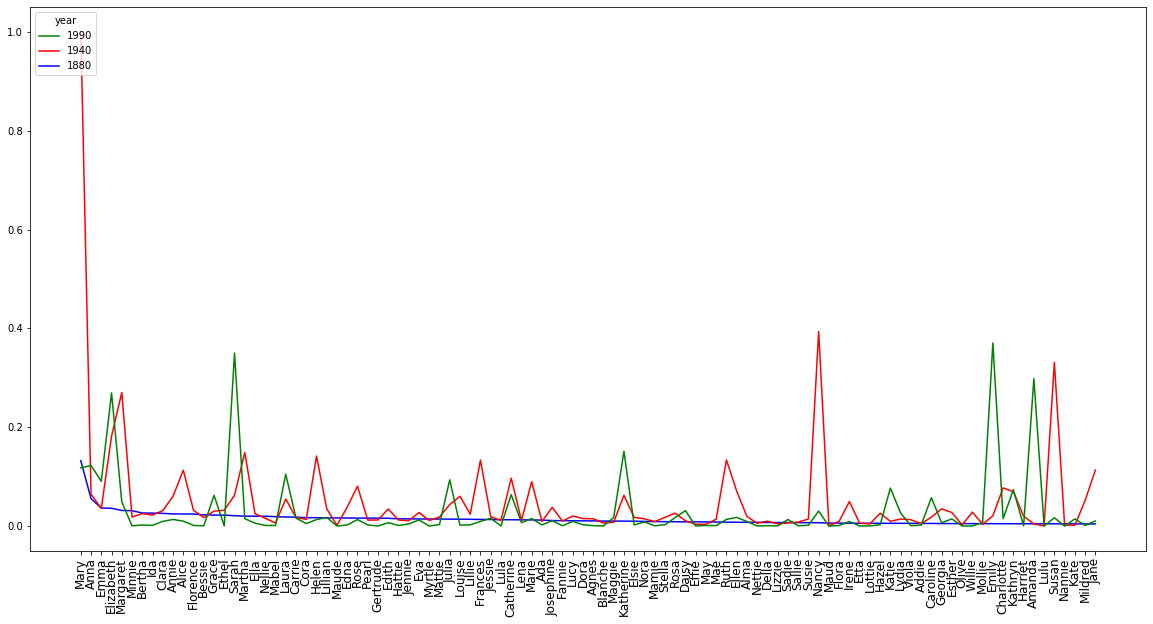

In [429]:
import matplotlib.pyplot as plt

import numpy as np

fig, ax = plt.subplots(figsize=(20,10))

(rects1,) = ax.plot(names['name'], names[1880], color='b', label='1880')
(rects2,) = ax.plot(names['name'], names[1940], color='r', label='1940')
(rects3,) = ax.plot(names['name'], names[1990], color='g', label='1990')
ax.legend((rects3,rects2,rects1),('1990','1940','1880'),loc='upper left',title='year')

ax.set_xticklabels(labels = names['name'], rotation=90, fontsize=12)


plt.show()

Female name "Mary" saw a lot of change over the years

Names Nancy, Elizabeth, Susan were most common in 1940's

Names Emily, Sarah, Amanda were most common in 1990's


# Part 4

In [381]:
import pandas as pd
years = list(range(1881,2011))
all_names = []
columns = ['name','sex','births']
    
for year in years:
    path = f'/names/yob{year:d}.txt'
    #f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    all_names.append(frame)    
    
names = pd.concat(all_names, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881
...,...,...,...,...
1688779,Zymaire,M,5,2010
1688780,Zyonne,M,5,2010
1688781,Zyquarius,M,5,2010
1688782,Zyran,M,5,2010


In [382]:
data = names[["name", "sex"]]
data

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Margaret,F
...,...,...
1688779,Zymaire,M
1688780,Zyonne,M
1688781,Zyquarius,M
1688782,Zyran,M


In [383]:
#creating a specific lists of male and female names
male_names = []
female_names = []

for index, row in data.iterrows():
    curr_name = row['name']
    curr_sex = row['sex']
    if curr_sex == 'F':
        female_names.append(curr_name)
    else:
        male_names.append(curr_name)


In [388]:
#assigning gender labels to the names
labeled_names = ([(name, 'male') for name in male_names]+
             [(name, 'female') for name in female_names]) 

In [389]:
# picking first three and last three letters from names, padding whitespace if the name < 3 character and return dict of features of a name
def gender_features(word): 
    if len(word) < 3:
        word = word.ljust(3)
    return {'first_three':word[0:3], 'last_three':word[-3:]} 
  

In [390]:
#a list of tuples containing features (dict of first_three, last_three), target (gender)
featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 

In [391]:
featuresets

[({'first_three': 'Joh', 'last_three': 'ohn'}, 'male'),
 ({'first_three': 'Wil', 'last_three': 'iam'}, 'male'),
 ({'first_three': 'Jam', 'last_three': 'mes'}, 'male'),
 ({'first_three': 'Geo', 'last_three': 'rge'}, 'male'),
 ({'first_three': 'Cha', 'last_three': 'les'}, 'male'),
 ({'first_three': 'Fra', 'last_three': 'ank'}, 'male'),
 ({'first_three': 'Jos', 'last_three': 'eph'}, 'male'),
 ({'first_three': 'Hen', 'last_three': 'nry'}, 'male'),
 ({'first_three': 'Tho', 'last_three': 'mas'}, 'male'),
 ({'first_three': 'Edw', 'last_three': 'ard'}, 'male'),
 ({'first_three': 'Rob', 'last_three': 'ert'}, 'male'),
 ({'first_three': 'Har', 'last_three': 'rry'}, 'male'),
 ({'first_three': 'Wal', 'last_three': 'ter'}, 'male'),
 ({'first_three': 'Art', 'last_three': 'hur'}, 'male'),
 ({'first_three': 'Fre', 'last_three': 'red'}, 'male'),
 ({'first_three': 'Alb', 'last_three': 'ert'}, 'male'),
 ({'first_three': 'Sam', 'last_three': 'uel'}, 'male'),
 ({'first_three': 'Dav', 'last_three': 'vid'}, '

In [392]:
#creating train and test sets using 70, 30 split
import random 
random.shuffle(featuresets) 
train_set, test_set = featuresets[:1182150], featuresets[1182151:] 

In [393]:
classifier = nltk.NaiveBayesClassifier.train(train_set) 

In [394]:
nltk.classify.accuracy(classifier, test_set)

0.8419546298800118

In [395]:
#test using a two lettered name
classifier.classify(gender_features('Al'))

'male'

In [396]:
classifier.classify(gender_features('Pat'))

'female'

In [397]:
classifier.classify(gender_features('Lee'))

'female'

Based on our classifier, few ambiguous names like Lee and Pat appear to be female names, this is due to the fact that the classifier has seen more occurrences of these ambiguous names as female name than male names.

One way to prevent to ambiguity is providing additional features, one such feature is decade

# Extra credit: Year as a feature to overcome ambiguity

In [398]:
# Adding decade as a feature
data_with_decade = names[["name", "sex", "year"]]

In [399]:
data_with_decade

,name,sex,year
0,Mary,F,1881
1,Anna,F,1881
2,Emma,F,1881
3,Elizabeth,F,1881
4,Margaret,F,1881
...,...,...,...
1688779,Zymaire,M,2010
1688780,Zyonne,M,2010
1688781,Zyquarius,M,2010
1688782,Zyran,M,2010


In [400]:
#creating a specific lists of names:year for male and female
male_names_with_decade = []
female_names_with_decade = []

for index, row in data_with_decade.iterrows():
    curr_name = row['name']
    curr_sex = row['sex']
    curr_year = row['year']
    if curr_sex == 'F':
        female_names_with_decade.append(curr_name + ":" + str(curr_year))
    else:
        male_names_with_decade.append(curr_name + ":" + str(curr_year))

In [401]:
#adding gender labels to the names after splitting name and year
labeled_names_with_decade = ([(name.split(":")[0], 'male', name.split(":")[1]) for name in male_names_with_decade]+
             [(name.split(":")[0], 'female', name.split(":")[1]) for name in female_names_with_decade]) 

In [402]:
labeled_names_with_decade

[('John', 'male', '1881'),
 ('William', 'male', '1881'),
 ('James', 'male', '1881'),
 ('George', 'male', '1881'),
 ('Charles', 'male', '1881'),
 ('Frank', 'male', '1881'),
 ('Joseph', 'male', '1881'),
 ('Henry', 'male', '1881'),
 ('Thomas', 'male', '1881'),
 ('Edward', 'male', '1881'),
 ('Robert', 'male', '1881'),
 ('Harry', 'male', '1881'),
 ('Walter', 'male', '1881'),
 ('Arthur', 'male', '1881'),
 ('Fred', 'male', '1881'),
 ('Albert', 'male', '1881'),
 ('Samuel', 'male', '1881'),
 ('David', 'male', '1881'),
 ('Louis', 'male', '1881'),
 ('Charlie', 'male', '1881'),
 ('Clarence', 'male', '1881'),
 ('Richard', 'male', '1881'),
 ('Joe', 'male', '1881'),
 ('Andrew', 'male', '1881'),
 ('Ernest', 'male', '1881'),
 ('Will', 'male', '1881'),
 ('Jesse', 'male', '1881'),
 ('Oscar', 'male', '1881'),
 ('Daniel', 'male', '1881'),
 ('Willie', 'male', '1881'),
 ('Benjamin', 'male', '1881'),
 ('Sam', 'male', '1881'),
 ('Alfred', 'male', '1881'),
 ('Roy', 'male', '1881'),
 ('Lewis', 'male', '1881'),
 

In [403]:
# picking decade (from year) , first three and last three letters from names, padding whitespace if the name < 3 character and return dict of features of a name
def gender_features_with_decade(word, year): 
    if len(word) < 3:
        word = word.ljust(3)
    return {'first_three':word[0:3], 'last_three':word[-3:], 'decade':10 * (int(year)//10)} 

In [405]:
#a list of tuples containing features (dict of first_three, last_three), target (gender)
featuresets_with_decade = [(gender_features_with_decade(n, year), gender)  
               for (n, gender, year)in labeled_names_with_decade] 

In [406]:
featuresets_with_decade

[({'first_three': 'Joh', 'last_three': 'ohn', 'decade': 1880}, 'male'),
 ({'first_three': 'Wil', 'last_three': 'iam', 'decade': 1880}, 'male'),
 ({'first_three': 'Jam', 'last_three': 'mes', 'decade': 1880}, 'male'),
 ({'first_three': 'Geo', 'last_three': 'rge', 'decade': 1880}, 'male'),
 ({'first_three': 'Cha', 'last_three': 'les', 'decade': 1880}, 'male'),
 ({'first_three': 'Fra', 'last_three': 'ank', 'decade': 1880}, 'male'),
 ({'first_three': 'Jos', 'last_three': 'eph', 'decade': 1880}, 'male'),
 ({'first_three': 'Hen', 'last_three': 'nry', 'decade': 1880}, 'male'),
 ({'first_three': 'Tho', 'last_three': 'mas', 'decade': 1880}, 'male'),
 ({'first_three': 'Edw', 'last_three': 'ard', 'decade': 1880}, 'male'),
 ({'first_three': 'Rob', 'last_three': 'ert', 'decade': 1880}, 'male'),
 ({'first_three': 'Har', 'last_three': 'rry', 'decade': 1880}, 'male'),
 ({'first_three': 'Wal', 'last_three': 'ter', 'decade': 1880}, 'male'),
 ({'first_three': 'Art', 'last_three': 'hur', 'decade': 1880}, '

In [407]:
#creating train and test sets using 70, 30 split
import random 
random.shuffle(featuresets_with_decade) 
train_set_with_decade, test_set_with_decade = featuresets_with_decade[:1182150], featuresets_with_decade[1182151:] 

In [408]:
classifier_with_decade = nltk.NaiveBayesClassifier.train(train_set_with_decade) 

In [409]:
nltk.classify.accuracy(classifier_with_decade, test_set_with_decade)

0.8417296149283604

In [415]:
#test for values
classifier_with_decade.classify(gender_features_with_decade('Pat','1890'))

'male'

In [417]:
classifier_with_decade.classify(gender_features_with_decade('Pat','1990'))

'female'

Our accuracy didn't change much, however we can now use decade to accurately classifiy ambiguous names which we couldn't previously